In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_ordenes = pd.read_csv(r"C:\Users\Sebastian\Desktop\Portafolio\Análisis EDA Instacart\orders.csv")
df_aisles = pd.read_csv(r"C:\Users\Sebastian\Desktop\Portafolio\Análisis EDA Instacart\aisles.csv")
df_departments = pd.read_csv(r"C:\Users\Sebastian\Desktop\Portafolio\Análisis EDA Instacart\departments.csv")
df_order_products_prior = pd.read_csv(r"C:\Users\Sebastian\Desktop\Portafolio\Análisis EDA Instacart\order_products__prior.csv")
df_order_products_train = pd.read_csv(r"C:\Users\Sebastian\Desktop\Portafolio\Análisis EDA Instacart\order_products__train.csv")
df_products = pd.read_csv(r"C:\Users\Sebastian\Desktop\Portafolio\Análisis EDA Instacart\products.csv")

In [7]:
print("orders \n",df_ordenes.head(),"\n")
print("ailes \n",df_aisles.head(),"\n")
print("departments \n",df_departments.head(),"\n")
print("order products prior \n",df_order_products_prior.head(),"\n")
print("order products train \n",df_order_products_train.head(),"\n")
print("products \n",df_products.head(),"\n")

orders 
    order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0   

ailes 
    aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation 

departments 
    department_id department
0              1     frozen
1              2      other
2         

In [8]:
print("orders \n",df_ordenes.shape,"\n")
print("ailes \n",df_aisles.shape,"\n")
print("departments \n",df_departments.shape,"\n")
print("order products prior \n",df_order_products_prior.shape,"\n")
print("order products train \n",df_order_products_train.shape,"\n")
print("products \n",df_products.shape,"\n")

orders 
 (3421083, 7) 

ailes 
 (134, 2) 

departments 
 (21, 2) 

order products prior 
 (32434489, 4) 

order products train 
 (1384617, 4) 

products 
 (49688, 4) 



In [9]:
print("orders \n",df_ordenes.info(),"\n")
print("ailes \n",df_aisles.info(),"\n")
print("departments \n",df_departments.info(),"\n")
print("order products prior \n",df_order_products_prior.info(),"\n")
print("order products train \n",df_order_products_train.info(),"\n")
print("products \n",df_products.info(),"\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
orders 
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
ailes 
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ----

El dataset de Instacart contiene varios archivos que representan diferentes niveles de información dentro de la plataforma (pedidos, productos, usuarios, departamentos, etc.).  
Entre ellos, el archivo **`order_products__prior`** es el más relevante para un análisis exploratorio enfocado en *retail* por varias razones:

###  1. Contiene el historial completo de compras
`prior` reúne **todas las compras históricas** que los usuarios han realizado antes del conjunto final de pedidos (`train` y `test`).  
Esto lo convierte en el dataset más rico para analizar:

- comportamiento de compra por producto  
- frecuencia de compra  
- patrones de demanda  
- relaciones entre productos  
- tasas de recompra (`reorder_rate`)  

###  2. Es el dataset más grande y representativo
A diferencia de `train`, que solo contiene una parte de los pedidos recientes, `prior` incluye millones de filas con información real y variada.  
Esto permite obtener conclusiones más robustas y útiles para un análisis profesional.

###  3. Es donde están los productos dentro de los pedidos
El archivo `orders` contiene información del *pedido* (día, hora, usuario), pero **no dice qué productos se compraron**.  
La información crítica sobre productos está en:

- `order_products__prior`  
- `products`  
- `aisles`  
- `departments`

Por eso, `prior` es el punto de partida para explorar la dinámica de ventas y productos.

---

## Foco del análisis

Mi análisis estará enfocado en **productos y comportamiento de compra dentro del retail**, con énfasis en descubrir patrones clave que son útiles para la toma de decisiones comerciales.

En particular, me concentraré en:

###  **1. Análisis de productos**
- Productos más vendidos  
- Distribución de ventas por departamento y pasillo  
- Tasa de recompra (`reorder_rate`)  
- Identificación de productos populares vs. nicho  

###  **2. Análisis de patrones de compra**
- Frecuencia de compra de productos  
- Productos que suelen aparecer juntos en el mismo pedido  
- Posición de productos en el carrito (`add_to_cart_order`)  

###  **3. Análisis orientado al retail**
- Comportamiento de demanda  
- Preferencias de los clientes según categorías  
- Insights útiles para decisiones de inventario, surtido y marketing  

---

## En resumen

El dataset `order_products__prior` es la base ideal para un análisis realista del sector retail porque:
- contiene el mayor volumen de transacciones históricas,  
- permite analizar productos en detalle,  
- y es el más adecuado para extraer insights comerciales sólidos.

A partir de este archivo y sus relaciones con `products`, `aisles` y `departments`, realizaré un EDA completo centrado en productos y patrones de compra dentro del ecosistema de Instacart.

In [10]:
#Revisar valores nulos y duplicados en el df
print(df_order_products_prior.isnull().sum(),"\n")
print(df_order_products_prior.duplicated().sum())

#Crear copia del df para evitar inconvenientes con el df original
df1 = df_order_products_prior.copy()


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64 

0


In [11]:
df1.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


## Descripción de columnas del dataframe `order_products_prior`

El dataframe `order_products_prior` contiene información detallada sobre los productos incluidos en cada pedido histórico realizado por los usuarios. Cada fila representa un producto específico dentro de un pedido. A continuación se describen sus columnas:

###  `order_id`
Identificador único del **pedido** al que pertenece el producto.  
Varios productos pueden compartir el mismo `order_id`, lo que indica que forman parte del mismo carrito de compras.

Ejemplo:  
Si un pedido contiene 5 productos, aparecerán 5 filas con el mismo `order_id`.

---

###  `product_id`
Identificador único del **producto**.  
Este valor se utiliza para relacionar esta tabla con la tabla `products`, donde se encuentran los nombres y categorías de cada producto.

---

###  `add_to_cart_order`
Indica el **orden en el que el producto fue agregado al carrito** dentro del pedido.

- Un valor de `1` significa que fue el primer producto añadido.
- Valores más altos indican productos agregados después.

Este campo puede ayudar a analizar patrones como:
- prioridad de productos
- productos agregados al inicio o al final del carrito
- comportamiento de compra dentro del mismo pedido

---

###  `reordered`
Indica si el producto ya había sido comprado anteriormente por el mismo usuario.

- `1` → Sí fue comprado antes (reordenado).  
- `0` → Es la primera vez que el usuario compra ese producto.

In [12]:
# Tipos de datos de las variables en el DF
print(df1.dtypes)

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object


In [13]:
# Distribución de categorias
print(df1["reordered"].value_counts(),"\n")

reordered
1    19126536
0    13307953
Name: count, dtype: int64 



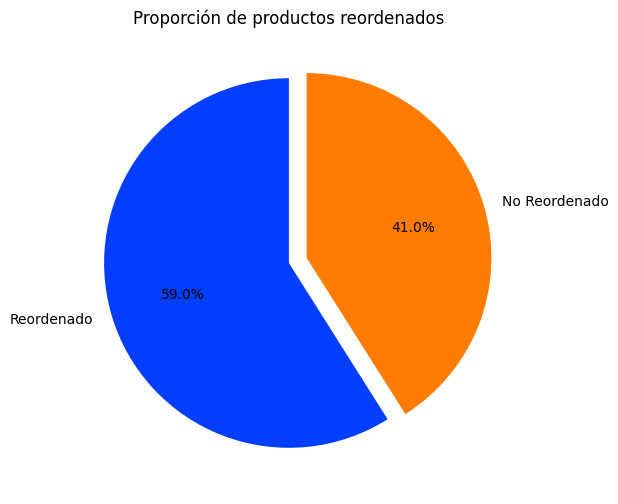

In [14]:
plt.figure(figsize=(8, 6))

counts = df1["reordered"].value_counts()

colors = sns.color_palette("bright")
explode = [0, 0.1]
plt.pie(
    counts,
    labels=["Reordenado", "No Reordenado"],
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    explode=explode
)

plt.title("Proporción de productos reordenados")
plt.show()

### Observación sobre la distribución de `reordered`

La variable `reordered` indica si un producto había sido comprado anteriormente por el mismo usuario:

- `1` → El producto fue **reordenado** (comprado antes).
- `0` → El producto fue comprado **por primera vez**.

Al analizar su distribución obtenemos:

- **1:** 19,126,536 registros  
- **0:** 13,307,953 registros  

Esto significa que:

- Aproximadamente **el 59% de los productos** incluidos en los pedidos corresponden a compras repetidas.
- Un **41%** corresponde a productos adquiridos por primera vez.

### Interpretación

La mayoría de las compras realizadas en Instacart son **recompras**, lo cual es común en contextos de retail donde los usuarios consumen productos de forma habitual (frutas, leche, pan, artículos de aseo, etc.).

Este comportamiento sugiere:

- Fuerte **fidelidad** hacia ciertos productos.  
- Un patrón de **compras recurrentes**, típico de supermercados.  
- Oportunidades para análisis como:
  - productos esenciales vs. productos ocasionales  
  - patrones de reposición  
  - predicción de compra futura  
  - estrategias de marketing personalizadas  

En general, esta distribución muestra que Instacart es un entorno donde la repetición de compras tiene un papel dominante en el comportamiento del usuario.


In [15]:
# Union de df de productos para el nombre del producto.
df1 = df1.merge(df_products, on="product_id", how="left")
df1.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


In [16]:
# Top de productos más vendidos
df_top_products = df1['product_name'].value_counts().head(10)
df_top_products

product_name
Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Organic Avocado           176815
Large Lemon               152657
Strawberries              142951
Limes                     140627
Organic Whole Milk        137905
Name: count, dtype: int64

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_19844\2288596115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


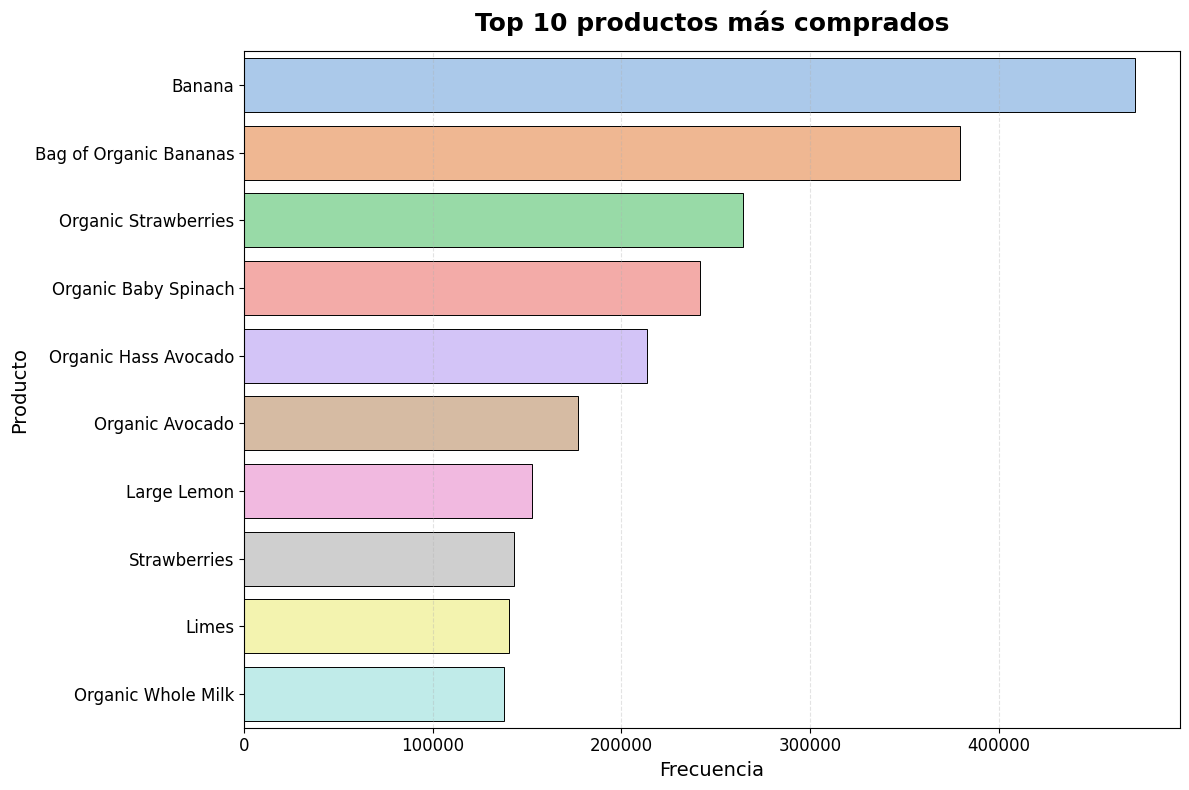

In [17]:
plt.figure(figsize=(12,8))
# Gráfico
sns.barplot(
    x=df_top_products.values,
    y=df_top_products.index,
    palette=sns.color_palette("pastel", n_colors=10),
    edgecolor="black",
    linewidth=0.7
)

plt.title("Top 10 productos más comprados", fontsize=18, weight="bold", pad=15)
plt.xlabel("Frecuencia", fontsize=14)
plt.ylabel("Producto", fontsize=14)

plt.grid(axis="x", linestyle="--", alpha=0.35)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout();

### Observación sobre el *Top 10 productos más comprados*

El análisis de los productos con mayor frecuencia de compra muestra que el consumo en Instacart está fuertemente orientado hacia alimentos frescos y de reposición frecuente.

Dentro del Top 10 destacan:

- **Banana** (el producto más comprado por amplio margen)
- **Organic Strawberries**
- **Organic Baby Spinach**
- **Organic Hass Avocado**
- **Organic Avocado**
- **Organic Whole Milk**

### Resultados principales

- Existe una alta demanda por **productos frescos** como frutas y vegetales.
- Los clientes muestran una **preferencia importante por productos orgánicos**, lo que indica un patrón de consumo saludable y premium.
- La mayoría de los productos del Top 10 son artículos de **reposicion frecuente**, típicos en la compra semanal del hogar.
- El Top 10 presenta **baja estacionalidad**, ya que la demanda de estos productos se mantiene estable durante el año.
- Todos los productos corresponden a **alimentos esenciales**, y no se observan snacks, bebidas o productos procesados en el ranking.

### Interpretación

Este comportamiento sugiere:

- Un patrón de demanda centrado en alimentos frescos y esenciales.
- Preferencias de los usuarios hacia productos saludables y orgánicos.
- Alta estabilidad en la compra de estos artículos, lo cual es clave para modelos de predicción de demanda, análisis de inventario y estrategias de retail.
- Fuerte repetición y consistencia en las compras, alineado con el comportamiento típico de supermercados y plataformas de delivery.

En conjunto, el Top 10 muestra que los clientes utilizan Instacart principalmente para abastecer productos esenciales y de consumo habitual.

In [18]:
# Union del df de aisle
df1 = df1.merge(df_aisles, on="aisle_id", how="left")
df1

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients
...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers
32434486,3421083,4600,8,0,All Natural French Toast Sticks,52,1,frozen breakfast
32434487,3421083,24852,9,1,Banana,24,4,fresh fruits


In [19]:
# Top de aisles más vendidas
df_top_aisle = df1["aisle"].value_counts().head(10)
df_top_aisle

aisle
fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
Name: count, dtype: int64

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_19844\3958236529.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


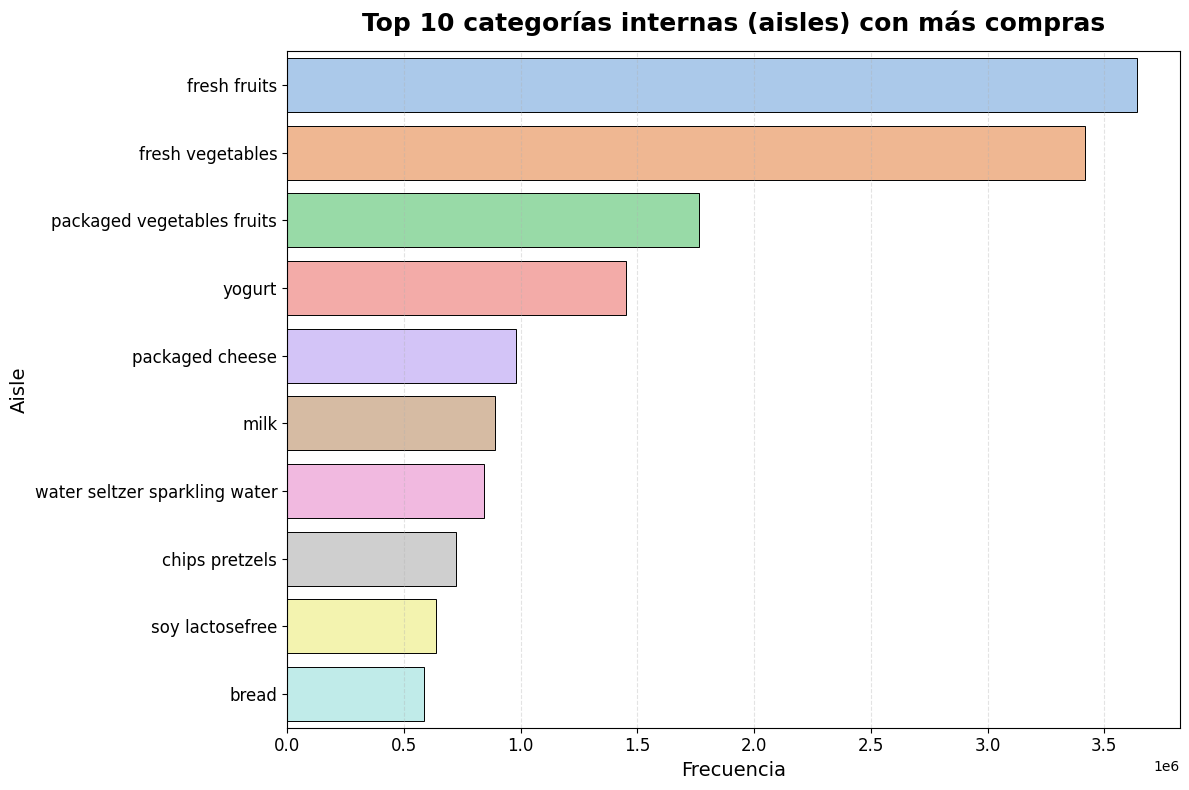

In [20]:
plt.figure(figsize=(12,8))
# Gráfico
sns.barplot(
    x=df_top_aisle.values,
    y=df_top_aisle.index,
    palette=sns.color_palette("pastel", n_colors=10),
    edgecolor="black",
    linewidth=0.7
)

plt.title("Top 10 categorías internas (aisles) con más compras", fontsize=18, weight="bold", pad=15)
plt.xlabel("Frecuencia", fontsize=14)
plt.ylabel("Aisle", fontsize=14)

plt.grid(axis="x", linestyle="--", alpha=0.35)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout();

### Observación sobre el *Top 10 categorías internas (aisles) con más compras*

El análisis de los “aisles” (pasillos o categorías internas de productos) muestra que la mayor actividad de compra se concentra en productos frescos y de reposición frecuente. Los pasillos más populares son:

- **fresh fruits**
- **fresh vegetables**
- **packaged vegetables fruits**
- **yogurt**
- **packaged cheese**
- **milk**

### Resultados principales

- Los dos pasillos más importantes (**fresh fruits** y **fresh vegetables**) superan ampliamente a los demás en volumen de compras, lo que confirma la importancia de los productos frescos dentro del comportamiento de los usuarios.
- Los pasillos relacionados con alimentos básicos y refrigerados (como **yogurt**, **cheese** y **milk**) también presentan una alta frecuencia.
- Los pasillos de productos de mayor conveniencia como **sparkling water**, **chips pretzels**, y opciones especializadas como **soy lactosefree** tienen menor volumen, pero aun así figuran dentro del Top 10.
- La distribución muestra una clara tendencia hacia productos esenciales que forman parte de las compras semanales del hogar.

### Interpretación

La presencia dominante de productos frescos y lácteos indica:

- Un patrón de consumo orientado a necesidades básicas del día a día.
- Preferencias hacia productos saludables y de corta vida útil, lo que implica una recurrencia alta en las compras.
- Oportunidades para análisis de inventarios, modelos de reposición y recomendaciones personalizadas.
- Una alta estabilidad de demanda en estos aisles, lo que refuerza su relevancia para entender el comportamiento general de los usuarios en Instacart.

En conjunto, estos resultados sugieren que Instacart se utiliza principalmente para comprar productos esenciales, frescos y de consumo constante.

In [21]:
# Union del df de department
df1 = df1.merge(df_departments, on="department_id", how="left")
df1

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry
...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents,household
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers,snacks
32434486,3421083,4600,8,0,All Natural French Toast Sticks,52,1,frozen breakfast,frozen
32434487,3421083,24852,9,1,Banana,24,4,fresh fruits,produce


In [22]:
# Top de department más vendidas
df_top_department = df1["department"].value_counts().head(10)
df_top_department

department
produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
Name: count, dtype: int64

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_19844\2926515900.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


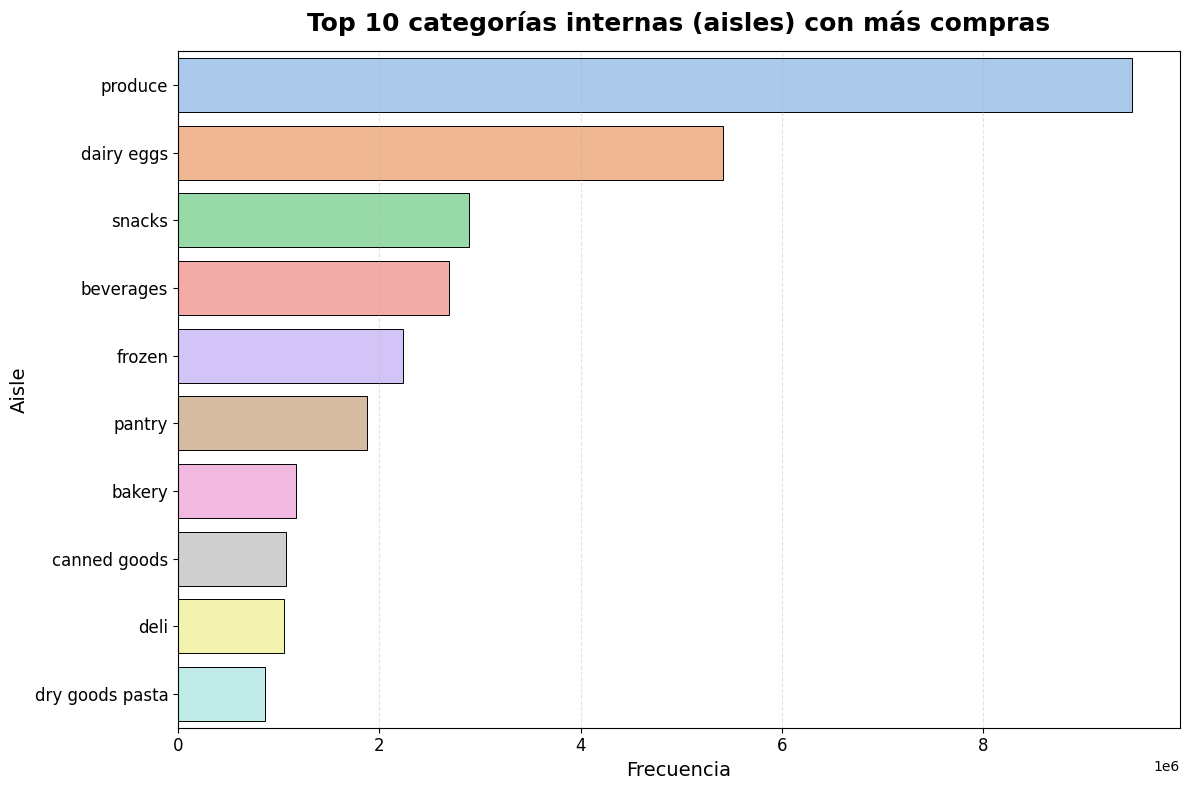

In [23]:
plt.figure(figsize=(12,8))

# Gráfico
sns.barplot(
    x=df_top_department.values,
    y=df_top_department.index,
    palette=sns.color_palette("pastel", n_colors=10),
    edgecolor="black",
    linewidth=0.7
)

plt.title("Top 10 categorías internas (aisles) con más compras", fontsize=18, weight="bold", pad=15)
plt.xlabel("Frecuencia", fontsize=14)
plt.ylabel("Aisle", fontsize=14)

plt.grid(axis="x", linestyle="--", alpha=0.35)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout();

###  Observaciones sobre el **Top 10 de categorías internas (aisles) con más compras**

El gráfico muestra cuáles son los *aisles* (categorías internas del supermercado) que concentran el mayor volumen de productos vendidos en Instacart. A partir de los resultados, podemos destacar lo siguiente:

---

###  1. Dominancia absoluta del aisle **“produce”**
- Es, por amplio margen, la categoría con **más compras registradas**.
- Esto indica que los usuarios compran productos frescos (frutas y verduras) con una frecuencia muy alta.
- Es consistente con compras recurrentes y artículos esenciales.

---

###  2. **“Dairy & eggs”** ocupa el segundo lugar
- Esta categoría incluye leche, huevos, yogurt y derivados.
- Son productos de **alta rotación**, lo cual explica su fuerte presencia.

---

###  3. Snacks, bebidas y congelados también son categorías importantes
- Aunque están por debajo de *produce* y *dairy & eggs*, representan volúmenes significativos.
- Son categorías asociadas tanto a consumo diario como a compras de conveniencia.

---

###  4. Categorías como **pantry**, **bakery** y **canned goods** mantienen una demanda estable
- Aportan un volumen moderado pero constante.
- Indican compras más planificadas o preparaciones en casa.

---

###  5. **Deli** y **dry goods/pasta** cierran el top 10
- Aunque tienen menor frecuencia, siguen siendo esenciales en compras semanales.

---

###  Interpretación general

- El patrón evidencia que **los consumidores priorizan productos frescos**, alimentos básicos y artículos de consumo recurrente.  
- Las categorías más bajas del top 10 siguen siendo importantes para abastecimiento regular.
- Este tipo de análisis permite:
  - Conocer patrones de demanda por tipo de producto.
  - Priorizar inventario.
  - Detectar oportunidades para promociones o cross-selling.

---

Si quieres también te genero una interpretación ejecutiva o insights con enfoque de negocio.  


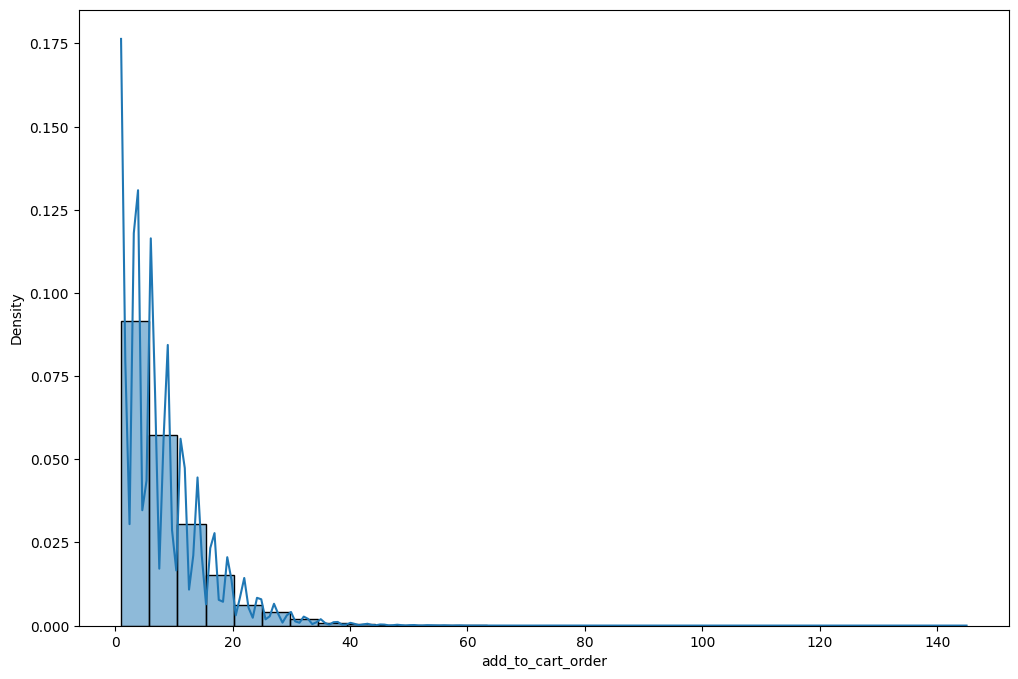

In [24]:
plt.figure(figsize=(12,8))

sns.histplot(df1["add_to_cart_order"], bins=30, stat="density",kde=True);

### Observación — Distribución de `add_to_cart_order`

La variable **`add_to_cart_order`** muestra una distribución **altamente sesgada a la derecha**, evidenciando que la mayoría de los productos son añadidos al carrito en las primeras posiciones de la compra.

- La mayor concentración de densidad se encuentra entre los valores **1 y 5**, indicando que los usuarios suelen agregar primero los productos más frecuentes o habituales.  
- La presencia de una **cola larga** hacia valores superiores refleja casos menos comunes donde ciertos artículos son agregados al final del proceso, aunque ocurren con muy baja frecuencia.  
- La curva KDE confirma esta tendencia, mostrando un pico pronunciado en los primeros valores y decreciendo rápidamente.

En conjunto, esta distribución sugiere patrones de compra repetitivos donde los productos más relevantes o de mayor prioridad se seleccionan al inicio del recorrido del usuario.